In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environment.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy

Mounted at /content/drive
Python 3.10.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.9/688.9 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 858.3/858.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1526911 sha256=a2853b82293253

{'None': [2.6151834789316153, -27.082698839352286, -34.74167430809856, -26.457588340244364], '[7, 0]': [-1.9892227516149472, -26.457588340244364, 0.5432812754053205, 2.568153100146525], '[7, -1]': [0.0, 0.0, 0.0, 0.0], '[6, 1]': [-0.0085, 1.2993259864300488, -0.0085, -0.08208287370569183], '[5, 1]': [0.01643013800295576, 0.0, 0.0, 1.1839791974961393], '[4, 1]': [2.176816262542687, 0.6906557734962273, -3.7081935409681517, 0.638694670225064], '[4, 0]': [0.6844936803663215, -41.0954897395385, 0.6522329751159593, 2.780825343671417], '[4, -1]': [0.0, 0.0, 0.0, 0.0], '[6, 0]': [0.4285663226138839, -27.70249589921779, 0.6155116245871619, 2.592040229029288], '[6, -1]': [0.0, 0.0, 0.0, 0.0], '[5, 0]': [-2.62102160083195, -30.129447292038034, 0.6303912767119508, 2.6775585546959193], '[5, -1]': [0.0, 0.0, 0.0, 0.0], '[3, 0]': [2.8596397498470174, -36.391656947917596, 0.5604728164620877, 0.13740804289980083], '[3, 1]': [0.6758707573290292, 0.7628475147755872, 2.610850756252639, -4.617007301972377]

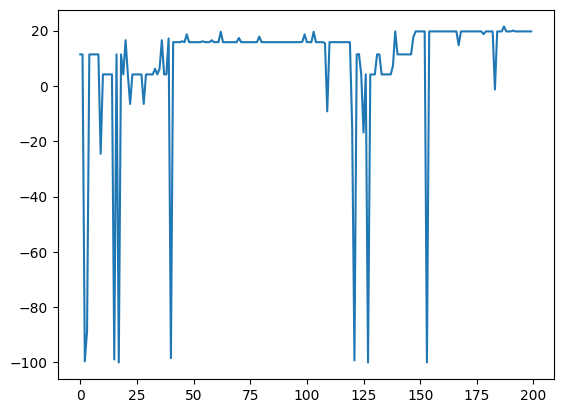

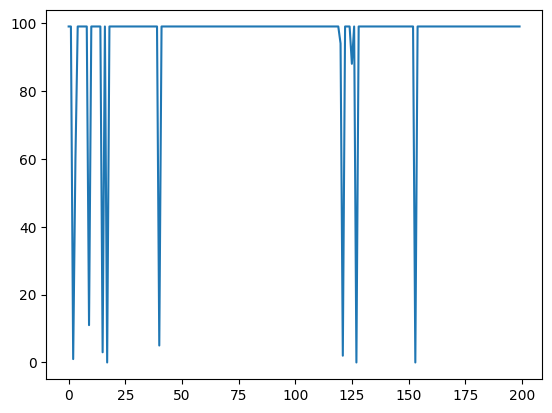

In [8]:
import numpy as np
import random
import pybullet as p
from environment import Env
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import math

cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory

global lr
lr=0.0085
global df
df=0.9
global eps
eps=0.0085
global number_of_steps
number_of_steps = 200

reward=0



class QLearningAgent:
    def __init__(self, actions):
        # actions = [0, 1, 2, 3]
        global lr
        global df
        global eps
        self.actions = actions
        self.learning_rate = lr #was 0.01
        self.discount_factor = df #was 0.9
        self.epsilon = eps# was 0.1
        #self.q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
        self.q_table = ({'None': [2.6151834789316153, -27.082698839352286, -34.74167430809856, -26.457588340244364], '[7, 0]': [-1.9892227516149472, -26.457588340244364, 0.5432812754053205, 2.568153100146525], '[7, -1]': [0.0, 0.0, 0.0, 0.0], '[6, 1]': [-0.0085, 1.2993259864300488, -0.0085, -0.08208287370569183], '[5, 1]': [0.01643013800295576, 0.0, 0.0, 1.1839791974961393], '[4, 1]': [2.176816262542687, 0.6906557734962273, -3.7081935409681517, 0.638694670225064], '[4, 0]': [0.6844936803663215, -41.0954897395385, 0.6522329751159593, 2.780825343671417], '[4, -1]': [0.0, 0.0, 0.0, 0.0], '[6, 0]': [0.4285663226138839, -27.70249589921779, 0.6155116245871619, 2.592040229029288], '[6, -1]': [0.0, 0.0, 0.0, 0.0], '[5, 0]': [-2.62102160083195, -30.129447292038034, 0.6303912767119508, 2.6775585546959193], '[5, -1]': [0.0, 0.0, 0.0, 0.0], '[3, 0]': [2.8596397498470174, -36.391656947917596, 0.5604728164620877, 0.13740804289980083], '[3, 1]': [0.6758707573290292, 0.7628475147755872, 2.610850756252639, -4.617007301972377], '[2, 0]': [-0.039550751862025536, -1.6927750000000001, 0.5978674511482597, 0.01169012876083198], '[2, -1]': [0.0, 0.0, 0.0, 0.0], '[3, -1]': [0.0, 0.0, 0.0, 0.0], '[2, 1]': [0.0, 0.0, 0.8793148471488959, 0.0], '[3, 2]': [0.9123092593758116, 1.1457182633811034, 0.8043330227520276, 1.2109239835083163], '[2, 2]': [1.245318828170118, 0.6505270301211876, 0.7182840644977153, 0.604656259437703], '[4, 2]': [0.8114901027596265, 1.0905045388222636, 1.1068440273945024, 1.216055187077792], '[1, 0]': [-0.18243108253164253, -4.992845446490854, 0.011778336959220115, 0.0], '[1, 1]': [0.0, 0.0, -0.005472028957185435, 0.0], '[2, 3]': [0.9473655755705782, 0.9371811192501023, 0.8774241904324394, 1.249611223847287], '[2, 4]': [0.7916115306408789, 0.7739629976296932, 1.361009309486372, 0.9325210150766272], '[1, 4]': [1.3786827275097004, 0.8378270724540763, 0.9017788413910047, 0.8499341829175198], '[1, 5]': [0.9077813449062944, 0.8428021073987314, 1.391977194380728, 0.6070176233293716], '[0, 4]': [0.6006675750437864, 0.7868144553945977, 1.3769261355183515, -71.97051859250767], '[-1, 4]': [0.0, 0.0, 0.0, 0.0], '[1, -1]': [0.0, 0.0, 0.0, 0.0], '[3, 3]': [0.9741214975310061, 1.116447005170195, 1.2762167763464776, 1.097776787209036], '[1, 3]': [0.9418696223674703, 0.633059882822431, 0.7618855415647704, 1.284800145356829], '[1, 2]': [1.054916704642372, -0.09158328580339734, 0.0005808790983062094, 0.0020455937021920524], '[1, 6]': [0.012640304616571323, 1.5680893672802358, 0.017048016866162048, 0.006184837274905763], '[0, 5]': [0.0012669024089200856, 0.01317468237761102, 1.1389757803907032, 0.0], '[0, 3]': [1.3362912684577737, 0.4717385490747994, 0.6980283824802908, -71.4878724249491], '[0, 2]': [0.7837600470034845, 0.001253542393904537, 0.0, 0.0], '[5, 2]': [1.515940882281109, 0.0, 0.0, 0.0], '[5, 3]': [1.3292436129998124, 1.1201878947166377, 0.10365183448444487, 0.713057328052564], '[5, 4]': [1.2433856876738116, 0.6724196219304283, -0.08443399749836897, 0.719269373695103], '[5, 5]': [1.1940407240560742, 0.6169537803973281, 1.083364711222431, 0.7786661368346115], '[5, 6]': [0.3744598110003166, 0.6701093841989643, 0.9915661217960641, 1.2033055053552375], '[6, 6]': [0.04724035869809447, 0.05541678496890824, 0.023220298205169153, 1.06208159359418], '[2, 6]': [0.002597161743945472, 0.036065701713108536, 1.0752103075549198, 0.013904517871637496], '[2, 7]': [0.0, 0.0, 0.0, 1.1574384407128009], '[1, 7]': [-0.085, 1.5216636700969308, 0.0, 0.000608335751480161], '[2, 5]': [0.6292589439490367, 1.3754230980205562, 0.9792185431433442, 0.8096712066084192], '[0, 6]': [0.0019144888807340018, 0.0, 0.0001734976918365613, -0.8500000000000001], '[-1, 6]': [0.0, 0.0, 0.0, 0.0], '[0, 7]': [0.0, 0.002177344071884232, 0.0, -1.6927750000000001], '[-1, 7]': [0.0, 0.0, 0.0, 0.0], '[3, 6]': [0.35459920217071383, 1.290481230590471, 0.5929438669899829, 0.5957399470437404], '[3, 5]': [0.7347271973904583, 0.7286975310640981, 1.3189217297313534, 0.9152693179597772], '[4, 3]': [1.0890579239070979, 1.1521232962051324, 1.1049063245667017, 0.8866035325273075], '[3, 4]': [1.1333727259287865, 1.3238959298556126, 1.129109221586465, 1.1323421406060767], '[4, 5]': [0.6042650819311403, 1.3033084094048606, 0.7055266848317874, 0.7261512253989135], '[4, 4]': [0.7115469731227134, 0.6792329732927835, 0.5802148228686483, 1.2064895677692447], '[4, 6]': [0.35548841232590117, 0.8119886860285896, 0.6154332797126975, 1.230352996512224], '[3, 7]': [-0.085, 0.00986209800149397, 0.0, 0.8269901149873039], '[6, 7]': [0.0, 0.03891065818723481, 9.176895305930523e-05, 0.0], '[-1, 3]': [0.0, 0.0, 0.0, 0.0], '[7, 6]': [0.003411835830432326, -0.005515632630530341, 0.0, 0.0], '[7, 5]': [0.00011011495707245365, 0.0, 0.0, -0.085], '[7, 7]': [0.0, 0.0, 0.0, 0.0031416107138327364], '[6, 5]': [1.0619605379092485, -0.08551361284837042, -0.16860700442698395, 0.004933878031318814], '[5, 7]': [-0.085, 0.0, 0.006558605964935056, 0.3728903363205953], '[4, 7]': [0.0, 0.00891444144226776, 0.0, 0.5783103710867032], '[5, 8]': [0.0, 0.0, -0.085, 0.0], '[6, 8]': [0.0, 0.0, 0.0, -0.085], '[1, 8]': [0.0, 0.0, -0.085, 0.0], '[2, 8]': [-0.085, 0.0, 0.0, -0.0085], '[0, 1]': [0.0, 0.0006012909641921109, 0.0, 0.0], '[0, 0]': [0.0, -0.8500000000000001, 0.0, 0.0], '[0, -1]': [0.0, 0.0, 0.0, 0.0], '[3, 8]': [0.0, 0.0024552301542612046, 0.0, 0.0]})
        global qarr
        qarr=self.q_table

    # update q function with sample <s, a, r, s'>
    def learn(self, state, action, reward, next_state):
        current_q = self.q_table[state][action]
        # using Bellman Optimality Equation to update q function
        new_q = reward + self.discount_factor * max(self.q_table[next_state])
        self.q_table[state][action] += self.learning_rate * (new_q - current_q)
        global qarr
        qarr=self.q_table
        #print(self.q_table)

    # get action for the state according to the q function table
    # agent pick action of epsilon-greedy policy
    def get_action(self, state):
        #self.epsilon=self.epsilon*0.99995
        if np.random.rand() < self.epsilon:
            # take random action
            action = np.random.choice(self.actions)
        else:
            # take action according to the q function table
            state_action = self.q_table[state]
            action = self.arg_max(state_action)
        return action

    @staticmethod
    def arg_max(state_action):
        max_index_list = []
        max_value = state_action[0]
        for index, value in enumerate(state_action):
            if value > max_value:
                max_index_list.clear()
                max_value = value
                max_index_list.append(index)
            elif value == max_value:
                max_index_list.append(index)
        return random.choice(max_index_list)

    def q_table(self):
        print(self.q_table)



if __name__ == "__main__":
    env = Env()
    agent = QLearningAgent(actions=list(range(env.n_actions)))

    global qarr
    print(qarr)

    episode_plot=[]
    reward_sum_plot=[]
    trial_plot=[]

    for episode in range(number_of_steps):
        state = env.reset()

        if episode%100==0:
            print(episode)
            print("Q_table")
            print(qarr)

        #global number_of_steps
        n=100
        for trial in range(n):
            env.render()

            # take action and proceed one step in the environment
            action = agent.get_action(str(state))
            next_state, reward, done, reward_sum = env.step(action)

            # with sample <s,a,r,s'>, agent learns new q function
            agent.learn(str(state), action, reward, str(next_state))

            state = next_state
            #env.print_value_all(agent.q_table)

            if trial==n-1:
                done=True

            # if episode ends, then break
            if done:

                #print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum)

                episode_plot=np.concatenate((episode_plot, [episode]))
                reward_sum_plot = np.concatenate((reward_sum_plot, [reward_sum]))
                trial_plot = np.concatenate((trial_plot, [trial]))


                break





f=plt.figure(1)
plt.plot(episode_plot, reward_sum_plot)
f.show()

g=plt.figure(2)
plt.plot(episode_plot, trial_plot)
g.show()

data_array = np.vstack((episode_plot, reward_sum_plot, trial_plot))

import csv

# field names
#fields = ['Episode', 'Reward', 'Trials']

# data rows of csv file
rows = data_array

# name of csv file
#filename = "university_records.csv"
filename = '/content/drive/My Drive/ColabNotebooks/5qlearning/CSVs/RP3_'+str(lr)+'_'+str(df)+'_'+str(eps)+'_'+str(number_of_steps)+'.csv'
print(filename)

# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)

    # writing the fields
    #csvwriter.writerow(fields)

    # writing the data rows
    csvwriter.writerows(rows)
#agent.q_table()

#plt.pause(0)

In [2]:
import numpy as np
data_array = np.vstack((episode_plot, reward_sum_plot, trial_plot))

import csv

# field names
#fields = ['Episode', 'Reward', 'Trials']

# data rows of csv file
rows = data_array

# name of csv file
#filename = "university_records.csv"
filename = '/content/drive/My Drive/ColabNotebooks/5qlearning/CSVs/RP3_'+str(lr)+'_'+str(df)+'_'+str(eps)+'_'+str(number_of_steps)+'.csv'
print(filename)

# writing to csv file
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)

    # writing the fields
    #csvwriter.writerow(fields)

    # writing the data rows
    csvwriter.writerows(rows)
#agent.q_table()

#plt.pause(0)

NameError: ignored